In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from functools import reduce
import datetime
import matplotlib.pyplot as plt

In [2]:
N=60

In [3]:
start_date = '2022-02-01'
earning = pd.read_csv('Russell3000EarningsAnnouncements.csv')
earning['date'] = pd.to_datetime(earning['date'])
earning.set_index('ticker', inplace = True)
earning

,date,period_ending,estimate,reported,surprise,surprise%,Unnamed: 7
ticker,,,,,,,
A,2022-11-21,Oct-22,1.39,1.53,0.14,10.07,2022-11-21
AA,2022-10-19,Sep-22,0.09,-0.33,-0.42,-466.67,2022-10-19
AAL,2022-10-20,Sep-22,0.54,0.69,0.15,27.78,2022-10-20
AAN,2022-10-24,Sep-22,0.16,0.31,0.15,93.75,2022-10-24
AAON,2022-11-07,Sep-22,0.44,0.51,0.07,15.91,2022-11-07
...,...,...,...,...,...,...,...
ZNTL,2022-11-09,Sep-22,-1.15,-0.96,0.19,16.52,2022-11-09
ZS,2022-12-01,Oct-22,0.26,0.29,0.03,11.54,2022-12-01
ZTS,2022-11-03,Sep-22,1.24,1.21,-0.03,-2.42,2022-11-03


In [4]:
IWV_price = yf.download("IWV", start = start_date).loc[:,['Adj Close']]
IWV_return = IWV_price.pct_change().dropna()
IWV_return.columns = ['return']  
IWV_return

[*********************100%***********************]  1 of 1 completed


,return
Date,
2022-02-02,0.006497
2022-02-03,-0.024385
2022-02-04,0.007158
2022-02-07,-0.003381
2022-02-08,0.009290
...,...
2023-05-09,-0.004063
2023-05-10,0.004419
2023-05-11,-0.002327


In [5]:
prices = yf.download(earning.index.to_list(), start = start_date, threads=True).loc[IWV_price.index]
prices = prices.T.loc['Adj Close',:].T

[*********************100%***********************]  2307 of 2307 completed


In [6]:
null_columns = prices.isnull().any() 
empty_columns = null_columns[null_columns].index.tolist()
empty_columns

['AMGN', 'BHVN', 'CSII', 'EE', 'FRC', 'MAXR', 'MSGE', 'OSH', 'PRVB']

In [7]:
returns = prices.pct_change().dropna(how = 'all')

In [8]:
cum_returns = prices.apply(lambda x: x/x.dropna().iloc[0] - 1)
cum_returns

,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,ABBV,ABC,...,ZG,ZI,ZION,ZIP,ZM,ZNTL,ZS,ZTS,ZUMZ,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-02-02,0.022761,0.017879,0.007724,-0.057233,-0.029462,0.008007,0.007044,0.001953,0.011825,-0.011478,...,-0.047253,-0.032781,0.003621,-0.037088,-0.048625,-0.000863,-0.013750,0.016594,-0.031777,-0.038741
2022-02-03,0.005389,0.078563,-0.015449,-0.039658,-0.042000,-0.009838,-0.009793,-0.019252,0.027226,0.001598,...,-0.083087,-0.095580,-0.002172,-0.037088,-0.113952,-0.050043,-0.061550,0.010308,-0.055008,-0.079903
2022-02-04,0.000638,0.104006,-0.022579,-0.063993,-0.060335,-0.033262,-0.012714,-0.019531,0.026642,-0.007627,...,-0.060051,-0.042357,0.030702,-0.006410,-0.074383,-0.084383,-0.008081,0.003369,-0.042078,-0.051453
2022-02-07,-0.004680,0.095926,0.026738,-0.045516,-0.071149,-0.037734,-0.016895,-0.018415,0.040365,0.012712,...,-0.068124,-0.037017,0.037654,-0.011905,-0.091470,-0.070751,0.007009,0.007291,-0.035065,-0.007869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09,-0.097001,-0.372357,-0.140226,-0.433078,0.515123,-0.465417,-0.016265,-0.474051,0.071752,0.226199,...,-0.082103,-0.623573,-0.646343,-0.217491,-0.591727,-0.606385,-0.578517,-0.072912,-0.646285,-0.530872
2023-05-10,-0.091966,-0.378718,-0.147950,-0.431275,0.522332,-0.464225,-0.006013,-0.471540,0.068759,0.235309,...,-0.084072,-0.611418,-0.656046,-0.242674,-0.586138,-0.579120,-0.552683,-0.069040,-0.652422,-0.517555
2023-05-11,-0.094802,-0.392642,-0.163993,-0.433979,0.501175,-0.471167,-0.004925,-0.473772,0.070000,0.249448,...,-0.113605,-0.609761,-0.671542,-0.290293,-0.586010,-0.549267,-0.557930,-0.069141,-0.645847,-0.523002


In [9]:
abnormal_returns = pd.DataFrame(returns.values - IWV_return.values, index = returns.index, columns = returns.columns)
abnormal_returns

,A,AA,AAL,AAN,AAON,AAP,AAPL,AAT,ABBV,ABC,...,ZG,ZI,ZION,ZIP,ZM,ZNTL,ZS,ZTS,ZUMZ,ZUO
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-02,0.016264,0.011382,0.001227,-0.063730,-0.035959,0.001510,0.000547,-0.004544,0.005328,-0.017974,...,-0.053750,-0.039278,-0.002876,-0.043585,-0.055122,-0.007360,-0.020247,0.010097,-0.038274,-0.045238
2022-02-03,0.007399,0.084003,0.001390,0.043027,0.011467,0.006682,0.007665,0.003221,0.039606,0.037612,...,-0.013226,-0.040543,0.018613,0.024385,-0.044280,-0.024838,-0.024081,0.018202,0.000392,-0.018436
2022-02-04,-0.011883,0.016432,-0.014400,-0.032498,-0.026297,-0.030815,-0.010107,-0.007442,-0.007726,-0.016369,...,0.017966,0.051690,0.025788,0.024701,0.037499,-0.043307,0.049817,-0.014026,0.006525,0.023763
2022-02-07,-0.001934,-0.003938,0.053837,0.023121,-0.008127,-0.001245,-0.000854,0.004519,0.016747,0.023877,...,-0.005208,0.008958,0.010125,-0.002149,-0.015079,0.018269,0.018594,0.007290,0.010702,0.049328
2022-02-08,-0.006155,0.088279,0.047423,0.023288,-0.000854,0.009565,0.009177,-0.011564,-0.002414,0.011010,...,-0.006754,0.016719,0.023090,-0.002802,-0.000452,-0.066671,0.020339,-0.004397,0.027958,0.003523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09,-0.034442,-0.004357,0.011723,0.022686,0.001278,0.002234,-0.005908,0.002474,-0.000142,0.004300,...,-0.011978,-0.027676,0.010658,-0.008647,0.014074,0.047521,0.023753,0.001358,-0.019531,0.004063
2023-05-10,0.001156,-0.014553,-0.013403,-0.001240,0.000339,-0.002188,0.006002,0.000355,-0.007212,0.003010,...,-0.006564,0.027870,-0.031856,-0.036602,0.009269,0.064849,0.056874,-0.000243,-0.021767,0.023968
2023-05-11,-0.000797,-0.020086,-0.016502,-0.002428,-0.011571,-0.010630,0.003422,-0.001897,0.003488,0.013772,...,-0.029917,0.006592,-0.042726,-0.060551,0.002637,0.073258,-0.009404,0.002219,0.021242,-0.008966


In [10]:
def get_ticker(ticker, date, N, df):
    date = pd.to_datetime(date)
    ticker_df = df.loc[:, ticker].dropna()
    ticker_df_1 = ticker_df[ticker_df.index < date].iloc[-N:]
    ticker_df_2 = ticker_df[ticker_df.index >= date].iloc[:N+1]
    ticker_df = pd.concat([ticker_df_1, ticker_df_2])
    return(ticker_df)

In [11]:
price_dict = {}
cum_return_dict = {}
abnormal_return_dict = {}
for ticker in earning.index:
    date = earning.loc[ticker, 'date']
    get_prices = get_ticker(ticker, date, N, prices)
    if len(get_prices) == 2*N+1:
        price_dict[ticker] = get_prices
        cum_return_dict[ticker] = get_ticker(ticker, date, N, cum_returns)
        abnormal_return_dict[ticker] = get_ticker(ticker, date, N, abnormal_returns)

df = earning.loc[price_dict.keys()].sort_values('surprise%', ascending=False)
beat_earning, miss_earning, meet_earning = df.iloc[:len(df)//3], df.iloc[-len(df)//3:], df.iloc[len(df)//3:-len(df)//3]

In [12]:
beat_earning

,date,period_ending,estimate,reported,surprise,surprise%,Unnamed: 7
ticker,,,,,,,
VIR,2022-11-03,Sep-22,0.01,1.30,1.29,12900.00,2022-11-03
RUN,2022-11-02,Sep-22,-0.01,0.96,0.97,9700.00,2022-11-02
GPS,2022-11-17,Oct-22,-0.02,0.71,0.73,3650.00,2022-11-17
HRMY,2022-11-01,Sep-22,0.10,0.95,0.85,850.00,2022-11-01
BAND,2022-11-01,Sep-22,0.03,0.27,0.24,800.00,2022-11-01
...,...,...,...,...,...,...,...
MVIS,2022-10-27,Sep-22,-0.09,-0.08,0.01,11.11,2022-10-27
BRKL,2022-10-26,Sep-22,0.36,0.40,0.04,11.11,2022-10-26
EXTR,2022-10-27,Sep-22,0.18,0.20,0.02,11.11,2022-10-27


In [13]:
list_AAR = []
list_CAAR = []
for i in range(40):
    group = beat_earning.sample(80).index.to_list()
    list_AR = []
    for ticker in group:
        list_AR.append(abnormal_return_dict[ticker].values)
    m = 0
    for j in range(0,len(list_AR)):
        m += list_AR[j]
    AAR = m / 80
    CAAR = np.cumsum(AAR) 
    list_AAR.append(AAR)
    list_CAAR.append(CAAR)

df_AAR = pd.DataFrame(np.vstack(list_AAR))
AAR_mean = df_AAR.apply(np.mean)
AAR_std = df_AAR.apply(np.std)

df_CAAR = pd.DataFrame(np.vstack(list_CAAR))
CAAR_mean = df_CAAR.apply(np.mean)
CAAR_std = df_CAAR.apply(np.std)
AAR_avg_beat, AAR_std_beat, CAAR_avg_beat, CAAR_std_beat = AAR_mean, AAR_std, CAAR_mean, CAAR_std
beat_matrix = [[AAR_avg_beat, AAR_std_beat, CAAR_avg_beat, CAAR_std_beat]]

In [14]:
beat_matrix

[[0     -0.000522
  1     -0.003213
  2     -0.002035
  3      0.001828
  4     -0.003580
           ...   
  116    0.000770
  117    0.000154
  118    0.001781
  119    0.000024
  120   -0.001149
  Length: 121, dtype: float64,
  0      0.003249
  1      0.003663
  2      0.003002
  3      0.002295
  4      0.002509
           ...   
  116    0.002240
  117    0.002584
  118    0.002762
  119    0.001872
  120    0.002591
  Length: 121, dtype: float64,
  0     -0.000522
  1     -0.003735
  2     -0.005771
  3     -0.003943
  4     -0.007523
           ...   
  116    0.075854
  117    0.076008
  118    0.077789
  119    0.077813
  120    0.076664
  Length: 121, dtype: float64,
  0      0.003249
  1      0.004731
  2      0.005356
  3      0.005759
  4      0.005618
           ...   
  116    0.023567
  117    0.023030
  118    0.023009
  119    0.023287
  120    0.023221
  Length: 121, dtype: float64]]

In [15]:
list_AAR = []
list_CAAR = []
for i in range(40):
    group = meet_earning.sample(80).index.to_list()
    list_AR = []
    for ticker in group:
        list_AR.append(abnormal_return_dict[ticker].values)
    m = 0
    for j in range(0,len(list_AR)):
        m += list_AR[j]
    AAR = m / 80
    CAAR = np.cumsum(AAR) 
    list_AAR.append(AAR)
    list_CAAR.append(CAAR)
df_AAR = pd.DataFrame(np.vstack(list_AAR))
AAR_mean = df_AAR.apply(np.mean)
AAR_std = df_AAR.apply(np.std)

df_CAAR = pd.DataFrame(np.vstack(list_CAAR))
CAAR_mean = df_CAAR.apply(np.mean)
CAAR_std = df_CAAR.apply(np.std)
AAR_avg_meet, AAR_std_meet, CAAR_avg_meet, CAAR_std_meet = AAR_mean, AAR_std, CAAR_mean, CAAR_std
meet_matrix = [[AAR_avg_meet, AAR_std_meet, CAAR_avg_meet, CAAR_std_meet]]
meet_matrix

[[0      0.000390
  1     -0.002554
  2     -0.000331
  3      0.000599
  4     -0.002253
           ...   
  116    0.000099
  117    0.001104
  118   -0.000622
  119   -0.001162
  120   -0.000366
  Length: 121, dtype: float64,
  0      0.002876
  1      0.002757
  2      0.001991
  3      0.002585
  4      0.002424
           ...   
  116    0.002079
  117    0.002392
  118    0.001847
  119    0.001879
  120    0.002405
  Length: 121, dtype: float64,
  0      0.000390
  1     -0.002164
  2     -0.002495
  3     -0.001896
  4     -0.004150
           ...   
  116    0.051945
  117    0.053050
  118    0.052427
  119    0.051265
  120    0.050899
  Length: 121, dtype: float64,
  0      0.002876
  1      0.003986
  2      0.004474
  3      0.004936
  4      0.005765
           ...   
  116    0.018865
  117    0.018848
  118    0.018916
  119    0.019058
  120    0.019736
  Length: 121, dtype: float64]]

In [16]:
list_AAR = []
list_CAAR = []
for i in range(40):
    group = miss_earning.sample(80).index.to_list()
    list_AR = []
    for ticker in group:
        list_AR.append(abnormal_return_dict[ticker].values)
    m = 0
    for j in range(0,len(list_AR)):
        m += list_AR[j]
    AAR = m / 80
    CAAR = np.cumsum(AAR) 
    list_AAR.append(AAR)
    list_CAAR.append(CAAR)

df_AAR = pd.DataFrame(np.vstack(list_AAR))
AAR_mean = df_AAR.apply(np.mean)
AAR_std = df_AAR.apply(np.std)

df_CAAR = pd.DataFrame(np.vstack(list_CAAR))
CAAR_mean = df_CAAR.apply(np.mean)
CAAR_std = df_CAAR.apply(np.std)
AAR_avg_miss, AAR_std_miss, CAAR_avg_miss, CAAR_std_miss = AAR_mean, AAR_std, CAAR_mean, CAAR_std
miss_matrix = [[AAR_avg_miss, AAR_std_miss, CAAR_avg_miss, CAAR_std_miss]]
miss_matrix

[[0      0.001586
  1     -0.003853
  2     -0.001731
  3      0.000636
  4     -0.003038
           ...   
  116    0.000331
  117    0.003181
  118    0.000260
  119    0.000869
  120    0.000148
  Length: 121, dtype: float64,
  0      0.003943
  1      0.003163
  2      0.003201
  3      0.002863
  4      0.003016
           ...   
  116    0.002059
  117    0.003115
  118    0.003315
  119    0.002229
  120    0.003122
  Length: 121, dtype: float64,
  0      0.001586
  1     -0.002266
  2     -0.003998
  3     -0.003361
  4     -0.006399
           ...   
  116   -0.009688
  117   -0.006507
  118   -0.006247
  119   -0.005378
  120   -0.005231
  Length: 121, dtype: float64,
  0      0.003943
  1      0.004930
  2      0.006249
  3      0.007307
  4      0.008179
           ...   
  116    0.032045
  117    0.031933
  118    0.030903
  119    0.031297
  120    0.032180
  Length: 121, dtype: float64]]

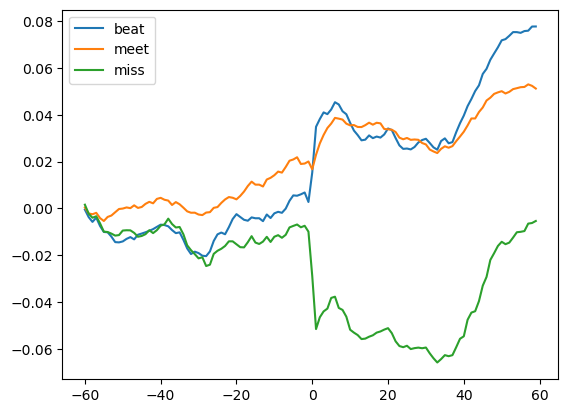

In [17]:
plt.plot(range(-N, N), CAAR_avg_beat.iloc[:-1])
plt.plot(range(-N, N), CAAR_avg_meet.iloc[:-1])
plt.plot(range(-N, N), CAAR_avg_miss.iloc[:-1])
plt.legend(['beat','meet','miss'])
plt.show()